In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
import os

In [ ]:
size_array = [1000,2000,4000,8000,16000,32000,64000,128000,256000]
def makefigure_DPUtime():
    x_axis = []
    result = []
    result_insert = []
    result_get= []
    result_total  = []
    df = pd.read_csv("data/requestnum.csv")
    result += df['DPU実行時間'].values.tolist()
    result_insert += df['insert平均サイクル'].values.tolist()
    result_get += df['get平均サイクル'].values.tolist()
    x_axis += df['挿入するキーの数'].values.tolist()
    plt.figure()
    plt.title("requestnum_DPUtime")
    plt.xlabel('num of requests')
    plt.ylabel('Time[s]')
    plt.plot(x_axis, result, label='total', marker='o')
    plt.ylim(0,)
    plt.xticks([1000]+x_axis[5:],["1000"]+[str(num) for num in x_axis[5:]])
    plt.grid()
    plt.savefig("graphs/requestnum_DPUtime.png")
    plt.show()

def makefigure_requestnum():
    x_axis = []
    result_insert = []
    result_get= []

    df = pd.read_csv("data/test.csv")
    #result += df['Time'].values.tolist()
    result_insert += df['cycles per insert'].values.tolist()
    result_get += df['cycles per get'].values.tolist()
    x_axis += df['num_of_requests'].values.tolist()
    plt.figure()
    plt.title("requestnum_averagecycle")
    plt.xlabel('num of requests')
    plt.ylabel('average DPU cycles')
    plt.plot(x_axis, result_insert, label='insert', marker='o')
    plt.plot(x_axis, result_get, label='get', marker='o')
    plt.ylim(0,)
    #plt.xscale('log')
    plt.xticks([1000]+x_axis[6:],["1000"]+[str(num) for num in x_axis[6:]])
    #plt.yscale('log')
    plt.legend()
    plt.grid()
    plt.savefig("graphs/test.png")
    plt.show()
    
def makefigure_taskletnum():
    x_axis = []
    throughput = []
    throughput_skew = []
    df = pd.read_csv("data/taskletnum_upmem_pointerdram.csv")
    #result += df['Time'].values.tolist()
    throughput += df[' throughput[OPS/s]'].values.tolist()
    for i in range (0, len(throughput)):
        throughput[i] = throughput[i]/1000000.0
        throughput_skew.append(0.040306)
    x_axis += df['num of tasklets'].values.tolist()
    fig = plt.figure()
    plt.rcParams["font.size"] = 18
    plt.rcParams["savefig.dpi"] = 300
    plt.title("スレッド数とスループットの関係")
    plt.xlabel('各DPUのスレッド数')
    plt.ylabel('スループット[MOPS/s]')
    plt.plot(x_axis, throughput, marker='o')
    plt.plot(x_axis, throughput_skew)
    plt.xlim(0,)
    plt.ylim(0,)
    #plt.xscale('log')
    #plt.xticks([1000]+x_axis[6:],["1000"]+[str(num) for num in x_axis[6:]])
    #plt.yscale('log')
    plt.grid()
    fig.subplots_adjust(bottom=0.13,left=0.15,top=0.93,right=0.99)
    plt.savefig("graphs/num_of_tasklets_pointerdram.png",transparent = True)
    plt.show()
    
def makefigure_taskletnum_time():
    x_axis = []
    time_sendreq = []
    time_dpuexe = []
    df = pd.read_csv("data/taskletnum_upmem_pointerdram.csv")
    time_sendreq += df[' time_sendrequests[s]'].values.tolist()
    time_dpuexe += df[' time_dpu_execution[s]'].values.tolist()
    x_axis += df['num of tasklets'].values.tolist()
    fig = plt.figure()
    plt.rcParams["font.size"] = 18
    plt.rcParams["savefig.dpi"] = 300
    plt.title("実行時間の内訳")
    plt.xlabel('各DPUのスレッド数')
    plt.ylabel('時間[s]')
    plt.bar(x_axis, time_sendreq, label="クエリ送信時間(CPU→DPU)",align="center", color = "c")
    plt.bar(x_axis, time_dpuexe, label="DPU実行時間",align="center", color = "b",bottom=time_sendreq)  
    plt.ylim(0,)
    #plt.xscale('log')
    #plt.xticks([1000]+x_axis[6:],["1000"]+[str(num) for num in x_axis[6:]])
    #plt.yscale('log')
    plt.legend()
    #plt.grid()
    fig.subplots_adjust(bottom=0.13,left=0.15,top=0.93,right=0.99)
    plt.savefig("graphs/num_of_tasklets_time_pointerdram.png",transparent = True)
    plt.show()
    
def makefigure_numcpu_throughput_ratio():
    zipf_const = ["0", "0.99", "1.2"]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    for a in zipf_const:
        x_axis = []
        throughput = []
        cpu_percent = []
        df = pd.read_csv("data/cpu_and_dpu_zipfianconst" + a + ".csv")
        #result += df['Time'].values.tolist()
        throughput += df[' throughput'].values.tolist()
        cpu_percent += df[' num_reqs_{cpu/(cpu+dpu)}'].values.tolist()
        for i in range (0, len(throughput)):
            throughput[i] = throughput[i]/1000000.0
        x_axis += df[' num_CPU_Trees'].values.tolist()
        plt.rcParams["savefig.dpi"] = 300
        plt.title("throughput",fontsize=18)
        plt.xlabel('number of Trees in CPU',fontsize=18)
        ax1.set_ylabel('throughput[MOPS/s]',fontsize=18)
        ax2.set_ylabel('query ratio in cpu[%]',fontsize=18)
        ax1.plot(x_axis, throughput, marker='o', label="zipf_const=" + a)
        ax2.plot(x_axis, cpu_percent, marker='x', label="zipf_const=" + a)
        #plt.xlim(0,)
        #plt.ylim(0,)
        plt.xscale('log')
        #plt.xticks([1000]+x_axis[6:],["1000"]+[str(num) for num in x_axis[6:]])
        ax1.set_yscale('log')
        plt.grid()
        fig.subplots_adjust()
    plt.legend()
    plt.savefig("graphs/cpu_and_dpu.png",transparent = False)
    plt.show()



In [ ]:
def makefigure_numcpu_throughput():
    zipf_const = ["0", "0.99", "1.2"]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for a in zipf_const:
        x_axis = []
        throughput = []
        cpu_percent = []
        df = pd.read_csv("../data/cpu_and_dpu_zipfianconst" + a + ".csv")
        #result += df['Time'].values.tolist()
        throughput += df[' throughput'].values.tolist()
        cpu_percent += df[' num_reqs_{cpu/(cpu+dpu)}'].values.tolist()
        for i in range (0, len(throughput)):
            throughput[i] = throughput[i]/1000000.0
        x_axis += df[' num_CPU_Trees'].values.tolist()
        plt.rcParams["savefig.dpi"] = 300
        #plt.title("CPU Skew",fontsize=18)
        plt.xlabel('Number of Trees in CPU',fontsize=18)
        ax1.set_ylabel('Throughput[MOPS/s]',fontsize=18)
        ax1.plot(x_axis, throughput, marker='o', label="Zipfian Const=" + a)
        #plt.xlim(0,)
        #plt.ylim(0,)
        plt.xscale('log')
        #plt.xticks([1000]+x_axis[6:],["1000"]+[str(num) for num in x_axis[6:]])
        ax1.set_yscale('log')
        plt.grid()
        fig.subplots_adjust()
    plt.legend()
    plt.savefig("../graphs/cpu_and_dpu.png",transparent = False)
    plt.show()

def makefigure_numcpu_throughput_ratio():
    zipf_const = ["0", "0.99", "1.2"]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for a in zipf_const:
        throughput = []
        cpu_percent = []
        df = pd.read_csv("../data/cpu_and_dpu_zipfianconst" + a + ".csv")
        #result += df['Time'].values.tolist()
        throughput += df[' throughput'].values.tolist()
        cpu_percent += df[' num_reqs_{cpu/(cpu+dpu)}'].values.tolist()
        for i in range (0, len(throughput)):
            throughput[i] = throughput[i]/1000000.0
        plt.rcParams["savefig.dpi"] = 300
        plt.title("throughput",fontsize=18)
        plt.xlabel('CPU Query Ratio',fontsize=18)
        ax1.set_ylabel('throughput[MOPS/s]',fontsize=18)
        ax1.plot(cpu_percent, throughput, marker='o', label="zipf_const=" + a)
        #plt.xlim(0,)
        #plt.ylim(0,)
        #plt.xscale('log')
        #plt.xticks([1000]+x_axis[6:],["1000"]+[str(num) for num in x_axis[6:]])
        ax1.set_yscale('log')
        plt.grid()
        fig.subplots_adjust()
    plt.legend()
    plt.savefig("../graphs/cpu_and_dpu_cpuratio.png",transparent = False)
    plt.show()

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
def makefigure_cyclic():
    zipf_const = ["0", "0.6", "0.99", "1.2"]
    cyclic = ["cyclic_",""]
    work_load = ["w05r95", "w50r50"]
    num_DPUs = 2048
    num_tasklets = 10
    num_CPU_trees = [16,32,64,256,512,1024] #X
    num_first_class_DPUs = [4,16,64,256,512,1024,1536,2047] #Y
    X = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs))) #CPU_trees/total_trees
    Y = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs))) #First-class_DPUs/total_DPUs
    Num_totaltrees = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs)))
    for i in range(len(num_CPU_trees)):
        for j in range(len(num_first_class_DPUs)):
            Num_totaltrees[i][j] = num_CPU_trees[i] + num_first_class_DPUs[j] + (num_DPUs - num_first_class_DPUs[j]) * num_tasklets
            X[i][j] = 100 * num_CPU_trees[i] / Num_totaltrees[i][j]
            Y[i][j] = 100 * num_first_class_DPUs[j] / num_DPUs
    plt.rcParams["savefig.dpi"] = 300
    for a in zipf_const:
        for b in cyclic:
            for c in work_load:
                throughput = []
                cpu_percent = []
                df = pd.read_csv("../data/" + b + "redundant_num_bptree_in_cpu_alpha" + a + "_" + c + ".csv")
                #sns.set(context='talk', style='ticks', palette='deep', font='Times New Roman', font_scale=1, color_codes=False, rc=None)
                plt.rcParams["font.family"] = "Times New Roman"
                plt.rcParams["font.size"] = 18
                fig, ax = plt.subplots()
                #fig.subplots_adjust(left=0.15, bottom=0.18,right=1,top=0.98)
                #result += df['Time'].values.tolist()
                throughput += df[' throughput'].values.tolist()[:48]
                for i in range (0, len(throughput)):
                    throughput[i] = throughput[i]/1000000.0
                Z = np.reshape(throughput,[6,8])
                cpu_percent += df[' exec_time_{cpu/(cpu&dpu)}[%]'].values.tolist()
                cont = ax.contour(X, Y, Z, colors = 'black')
                ax.clabel(cont, inline=True, inline_spacing=5, fontsize=12)
                contf = ax.contourf(X, Y, Z, cmap = 'Blues')
                cbar = fig.colorbar(contf)
                cbar.ax.set_ylabel('Throughput (MOPS/s)')
                cbar.add_lines(cont)

                plt.xlabel('# of trees in CPU (%)')
                ax.set_ylabel('First-class DPUs / total DPUs (%)')
                #ax.plot(x_axis, throughput, marker='o', label="Zipfian Const=" + a)
                plt.xlim(0,5)
                #plt.ylim(0,)

                #ax.set_xticks(x)
                #ax.set_yticks(y)
                #ax.set_xscale('log')
                #ax.set_yscale('log')
                plt.grid(c='lightgray', linewidth=1)
                #plt.legend()
                #plt.tick_params(labelsize=24)
                fig.subplots_adjust()
                plt.savefig("../graphs/" + b + "redundant_alpha" + a + "_" + c + ".svg",transparent = True)
                plt.show()

def show_max_throughputs():
    zipf_const = ["0", "0.6", "0.99", "1.2"]
    cyclic = ["cyclic_",""]
    work_load = ["w05r95", "w50r50"]
    x = [4,16,64,256,512,1024,1536,2047]
    y = [16,32,64,256,512,1024]
    X,Y = np.meshgrid(x,y)
    plt.rcParams["savefig.dpi"] = 300
    for a in zipf_const:
        for b in cyclic:
            for c in work_load:
                throughput = []
                num_dpus_redundant = []
                num_CPU_Trees = []
                df = pd.read_csv("../data/" + b + "redundant_num_bptree_in_cpu_alpha" + a + "_" + c + ".csv")
                throughput += df[' throughput'].values.tolist()[:48]
                num_dpus_redundant += df[' num_dpus_redundant'].values.tolist()[:48]
                num_CPU_Trees += df[' num_CPU_Trees'].values.tolist()[:48]
                max_throughput = 0
                max_i = 0
                for i in range (0, len(throughput)):
                    throughput[i] = throughput[i]/1000000.0
                    if(max_throughput < throughput[i]):
                        max_throughput = throughput[i]
                        max_i = i
                print("alpha=" +a + ", cyclic=" + b + ", work_load=" + c + ": max_throughput=" + str(max_throughput) + ", num_dpus_redundant=" + str(num_dpus_redundant[max_i])+ ", num_CPU_Trees="  + str(num_CPU_Trees[max_i]))



In [ ]:
show_max_throughputs()

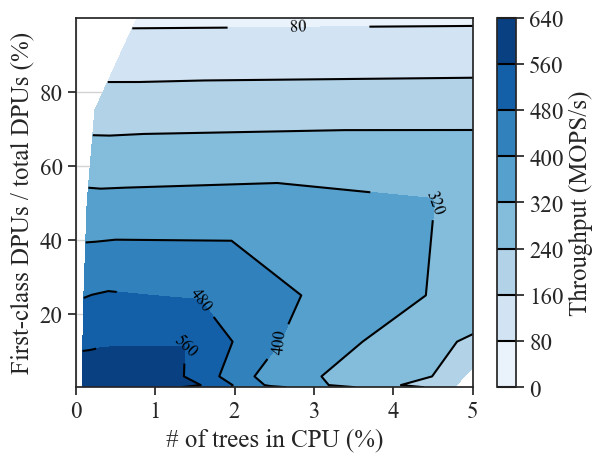

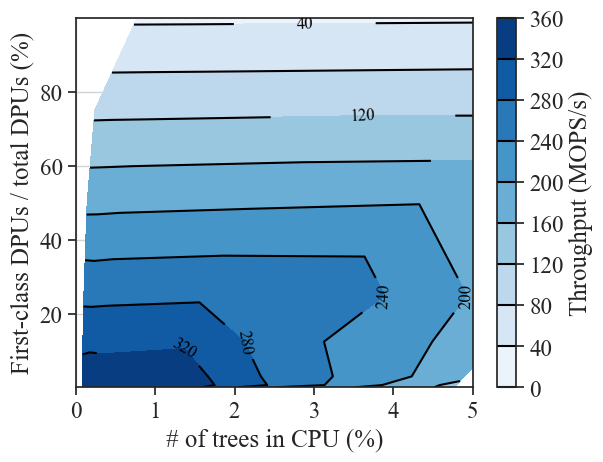

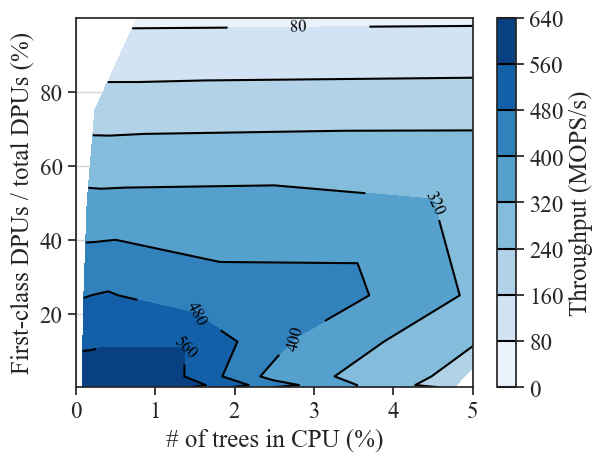

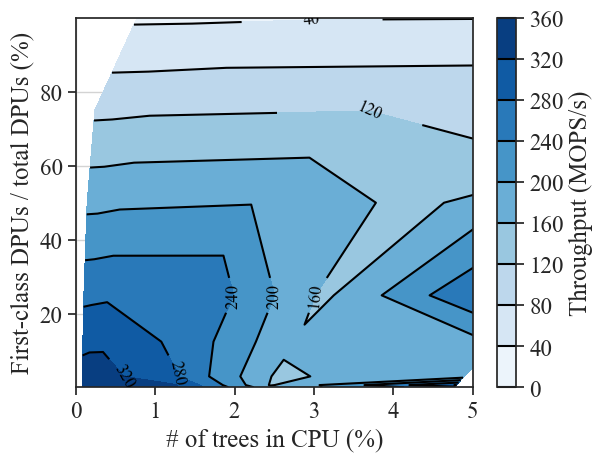

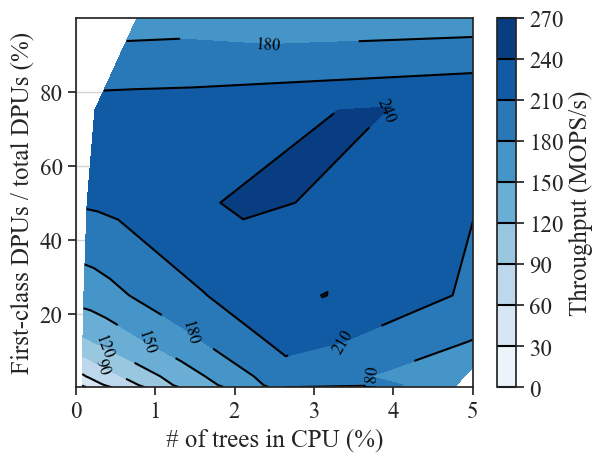

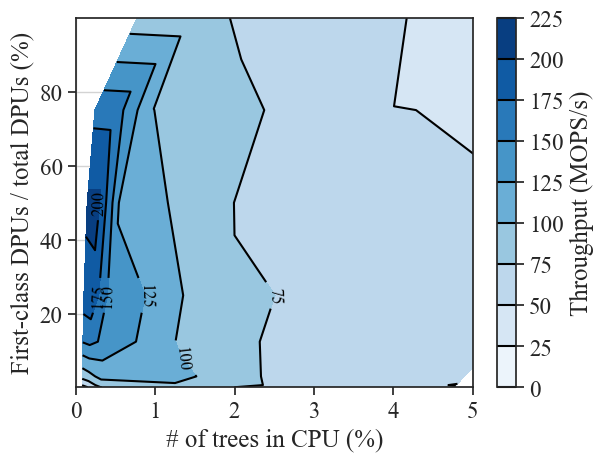

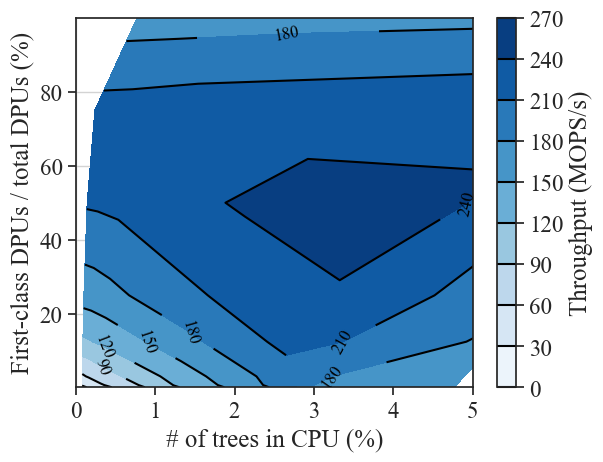

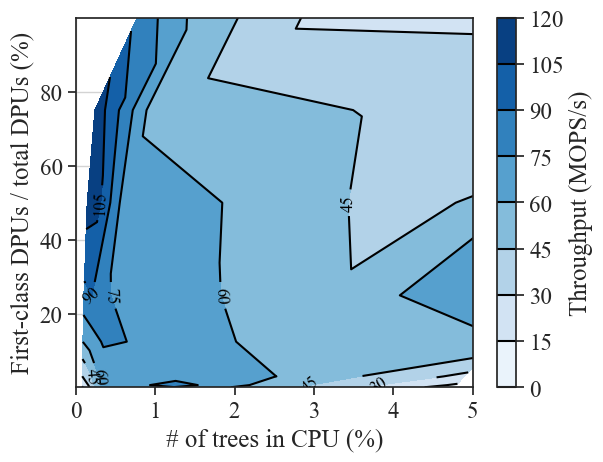

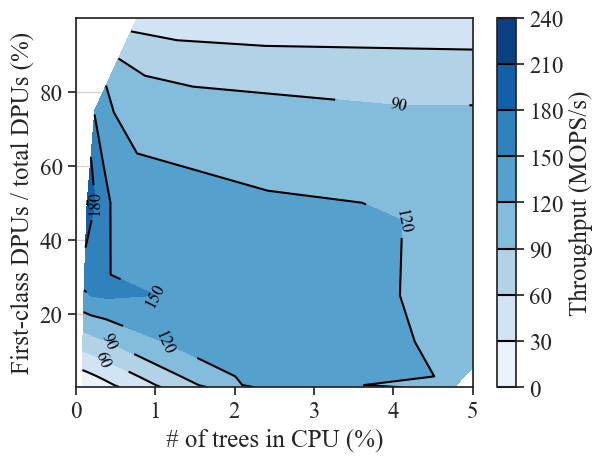

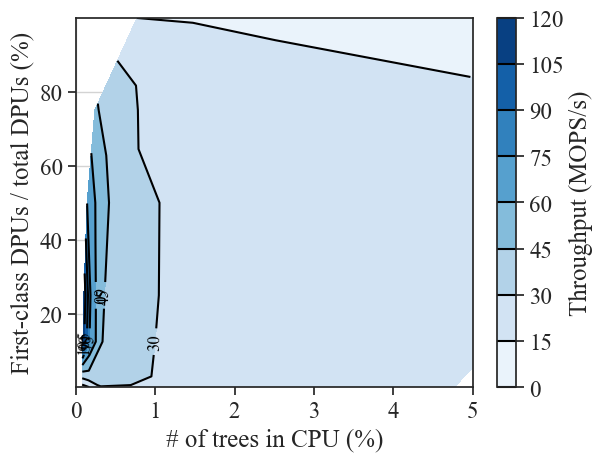

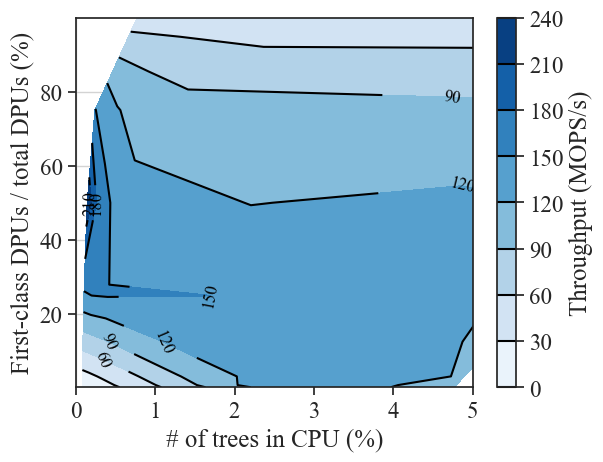

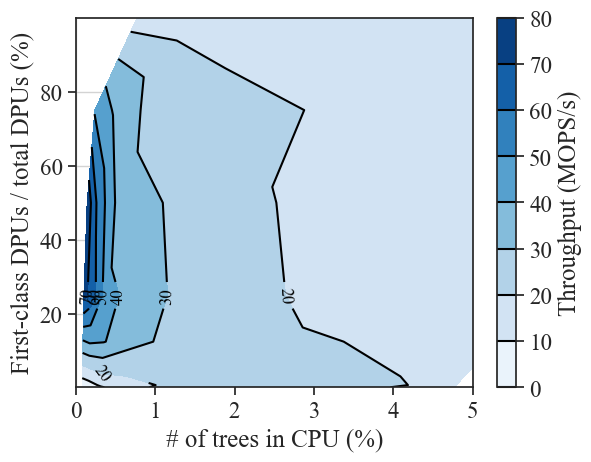

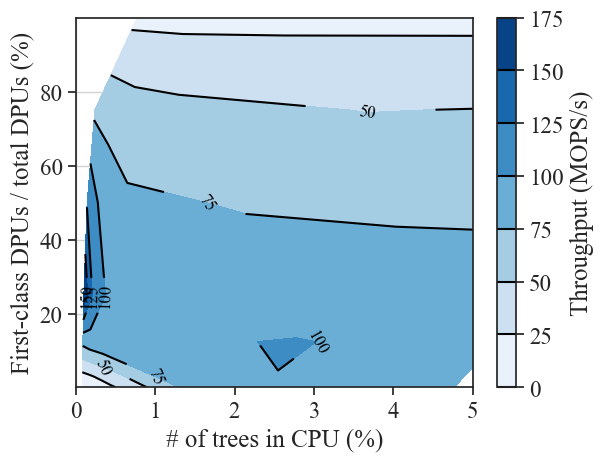

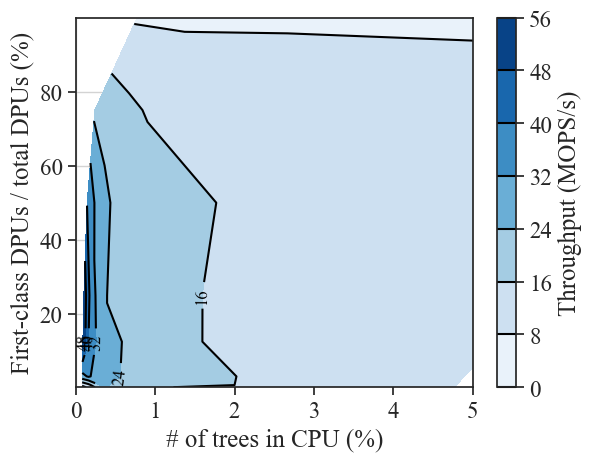

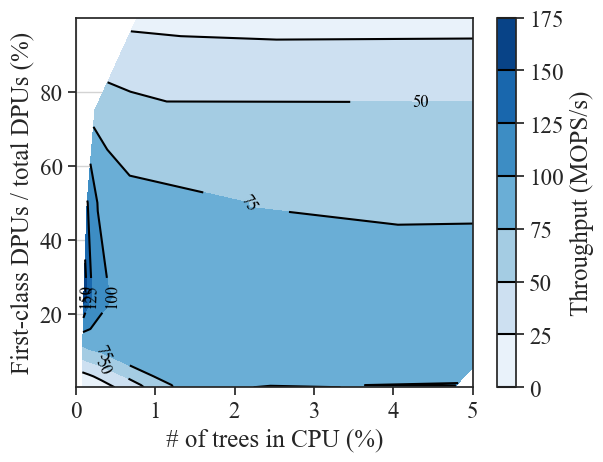

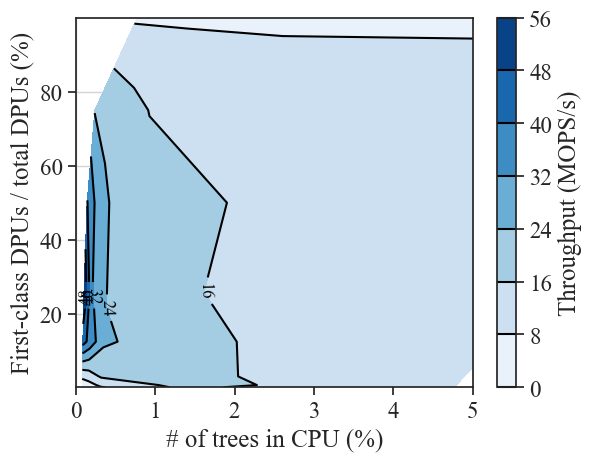

In [8]:
makefigure_cyclic()

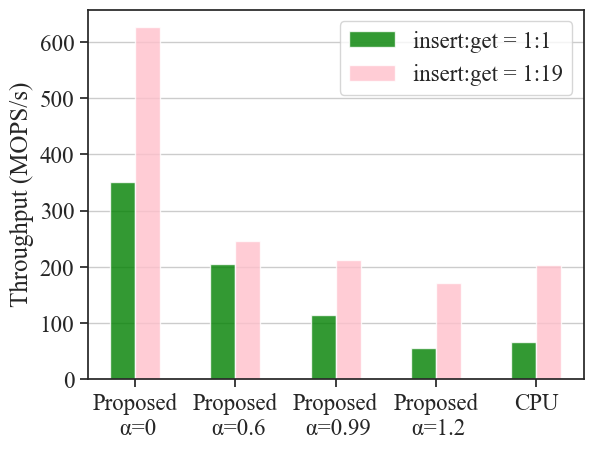

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(context='notebook', style='ticks', palette='deep', font='Times New Roman', font_scale=1.5, color_codes=False, rc=None)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
x_datas = [0,0.6,0.99,1.2]
ins1get1 =  [351,205,114,55,66]
ins1get19 = [626,247,212,172,204]
migration_x = [4,32,80,161,323]
migarion_y = [0.00395,0.0105,0.026243,0.049896,0.0995]

fig, ax = plt.subplots()
bar_width = 0.25
alpha = 0.8
index = np.arange(5)
plt.bar(index, ins1get1, bar_width,
alpha=alpha,color='green',label='insert:get = 1:1')
plt.bar(index + bar_width, ins1get19, bar_width,
alpha=alpha,color='pink',label='insert:get = 1:19')
plt.ylabel('Throughput (MOPS/s)')
ax.grid(axis='y')
plt.xticks(index + bar_width/2, ('Proposed\n α=0', 'Proposed\n α=0.6', 'Proposed\n α=0.99', 'Proposed\n α=1.2', 'CPU\n'))
plt.legend()
#ax.set_xlim(-0.2, 1.4)
#ax.set_ylim(0, 650)
#ax.set_xlabel('zipfian定数')
#ax.set_ylabel('スループット')
#ax.set_facecolor((1,1,1,0))
#plt.grid(True)
#plt.legend(loc = 'upper right')
plt.savefig('../graphs/maximum_throughput_new.svg')
plt.show()

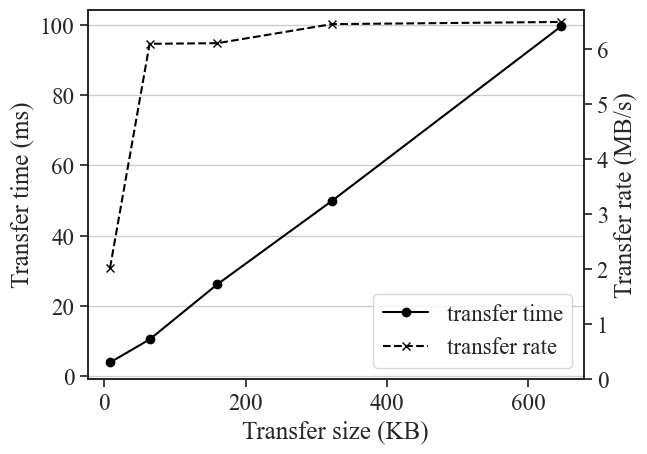

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(context='notebook', style='ticks', palette='deep', font='Times New Roman', font_scale=1.5, color_codes=False, rc=None)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
data_size = [8,64,160,322,646]
time = [3.95,10.5,26.2,49.9,99.5]
rate = [data_size[i]/time[i] for i in range(5)]

fig = plt.figure()
ax1 = fig.add_subplot()

ax2 = ax1.twinx()  #ax1のオブジェクトをax2オブジェクトに関連付け
ax1.plot(data_size, time, label = "transfer time",color= 'black', marker = 'o')
ax2.plot(data_size, rate, label = "transfer rate",color= 'black', marker = 'x',linestyle="dashed")
ax1.set_xlabel("Transfer size (KB)")  #x軸ラベル
ax1.grid(axis='y')
#ax1.set_xscale('log')
ax1.set_ylabel("Transfer time (ms)")  #y1軸ラベル
#ax2.set_xscale('log')
ax2.set_ylabel("Transfer rate (MB/s)")  #y2軸ラベル
ax2.set_ylim(0,)  #y2軸ラベル

#凡例
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2 ,loc='lower right')
plt.xticks()
#ax.set_xlim(-0.2, 1.4)
#ax.set_ylim(0, 650)
#ax.set_xlabel('zipfian定数')
#ax.set_ylabel('スループット')
#ax.set_facecolor((1,1,1,0))
#plt.grid(True)
#plt.legend(loc = 'upper right')
plt.savefig('../graphs/migration_cost.svg')
plt.show()

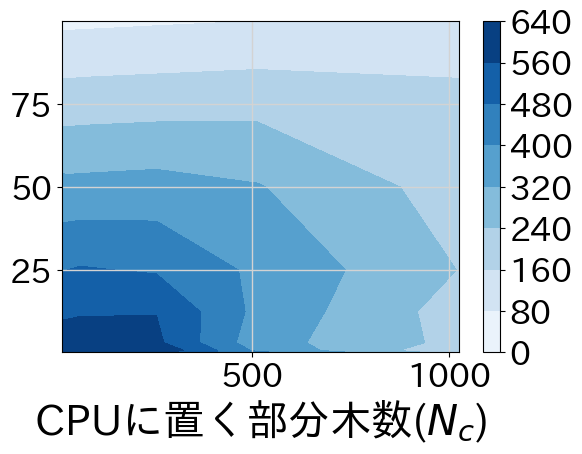

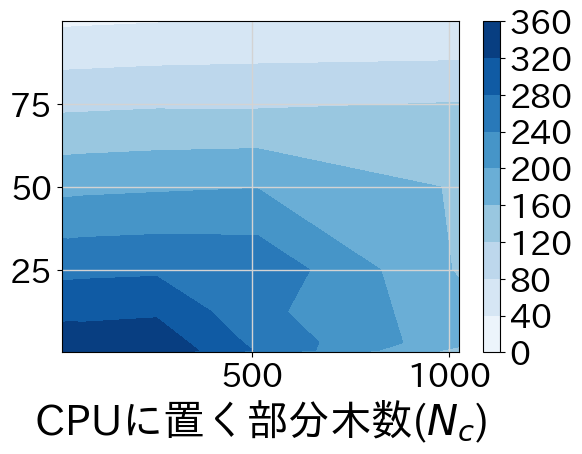

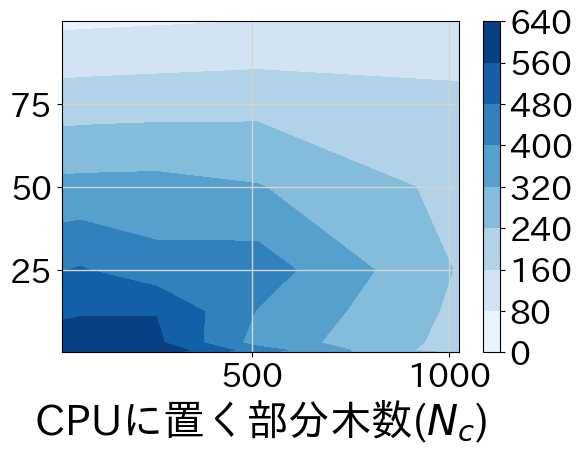

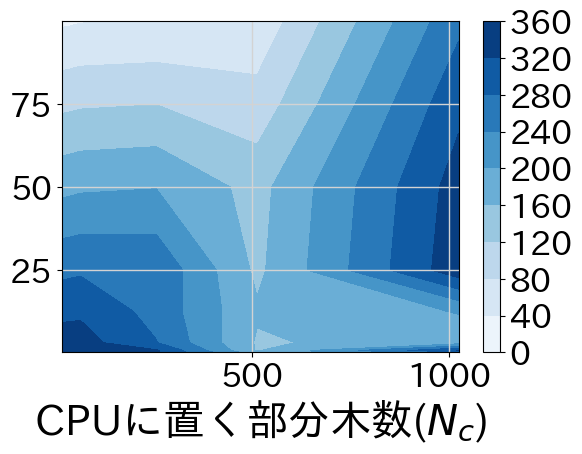

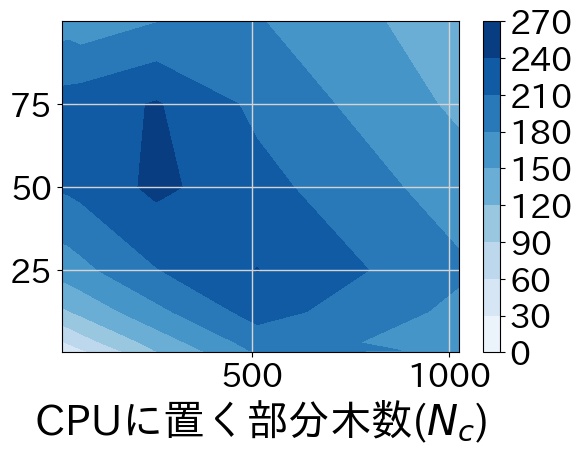

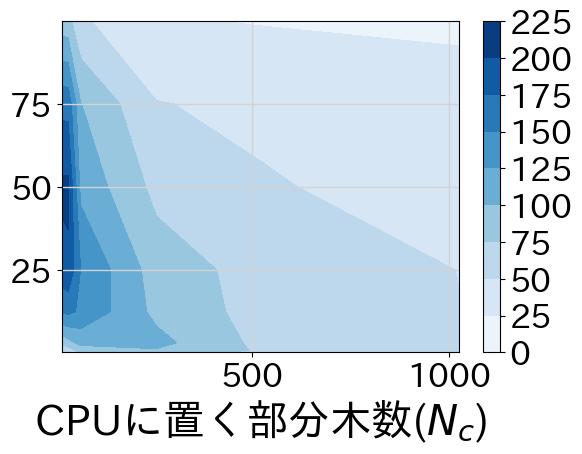

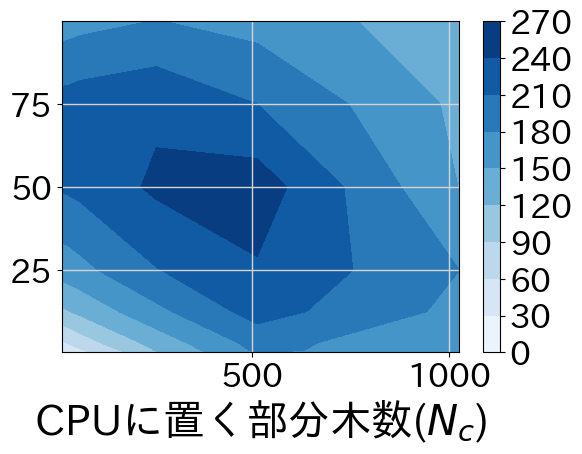

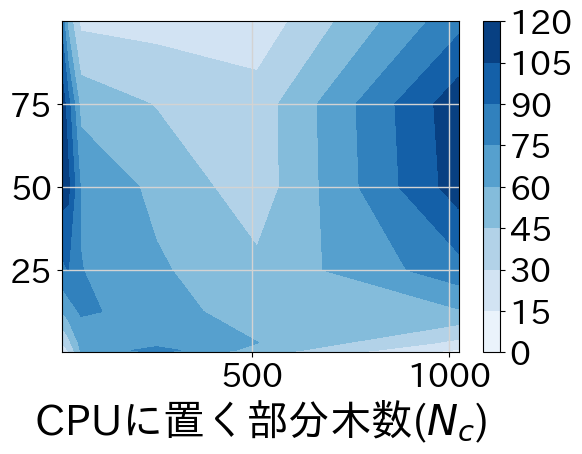

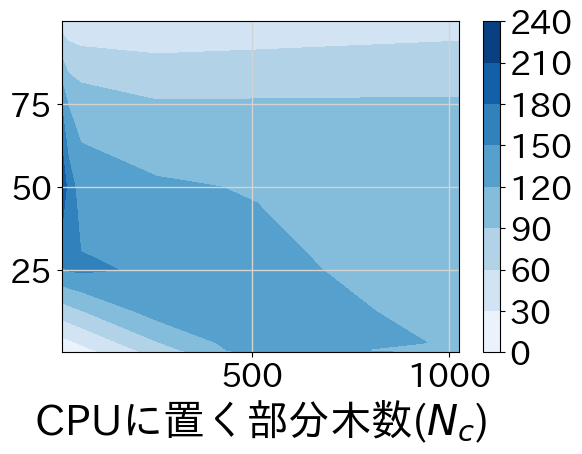

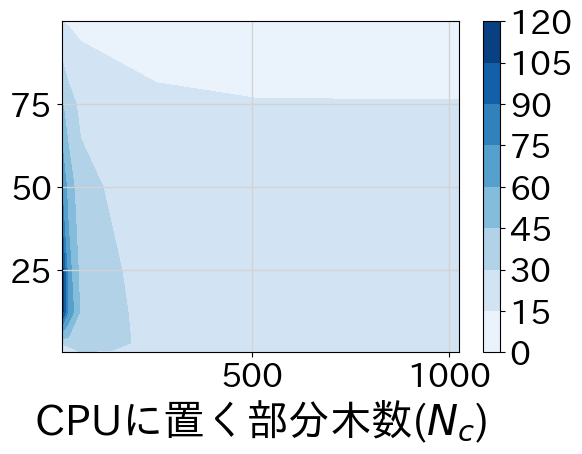

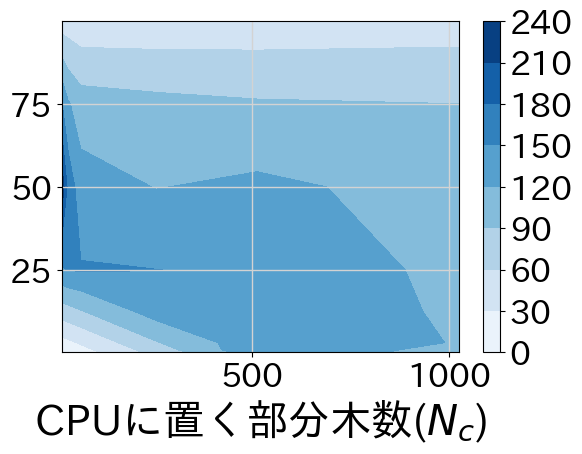

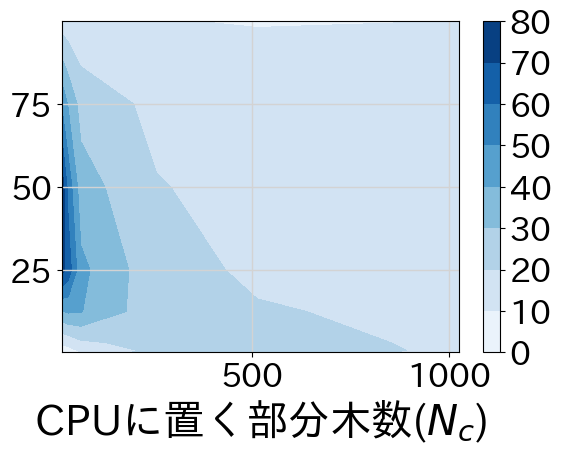

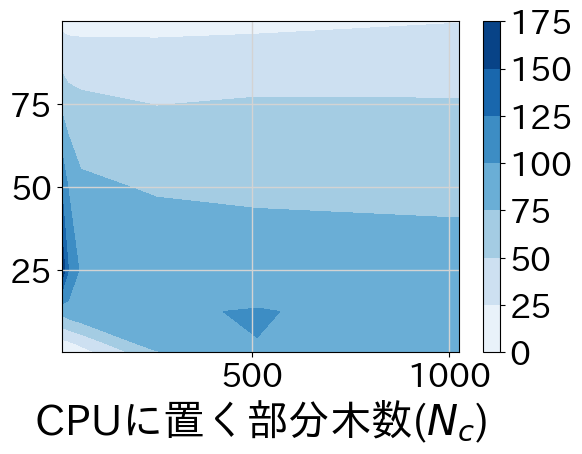

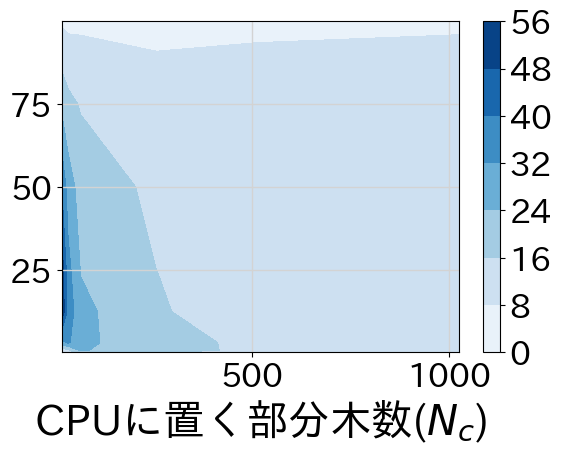

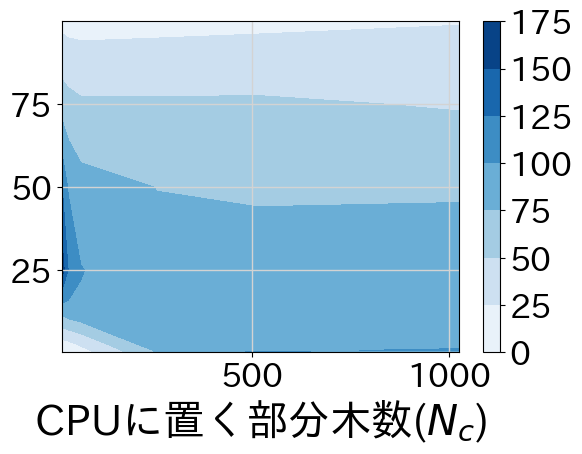

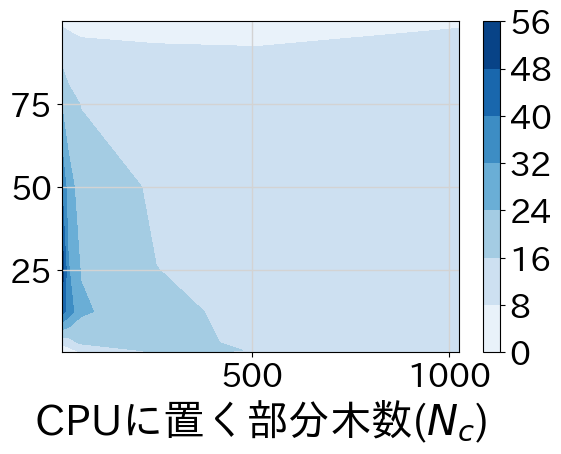

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
def makefigure_cyclic_slide():
    zipf_const = ["0", "0.6", "0.99", "1.2"]
    cyclic = ["cyclic_",""]
    work_load = ["w05r95", "w50r50"]
    num_DPUs = 2048
    num_tasklets = 10
    num_CPU_trees = [16,32,64,256,512,1024] #X
    num_first_class_DPUs = [4,16,64,256,512,1024,1536,2047] #Y
    X = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs))) #CPU_trees/total_trees
    Y = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs))) #First-class_DPUs/total_DPUs
    Num_totaltrees = np.zeros((len(num_CPU_trees), len(num_first_class_DPUs)))
    for i in range(len(num_CPU_trees)):
        for j in range(len(num_first_class_DPUs)):
            Num_totaltrees[i][j] = num_CPU_trees[i] + num_first_class_DPUs[j] + (num_DPUs - num_first_class_DPUs[j]) * num_tasklets
            X[i][j] = num_CPU_trees[i]
            Y[i][j] = 100 * num_first_class_DPUs[j] / num_DPUs
    plt.rcParams["savefig.dpi"] = 300
    for a in zipf_const:
        for b in cyclic:
            for c in work_load:
                throughput = []
                cpu_percent = []
                df = pd.read_csv("../data/" + b + "redundant_num_bptree_in_cpu_alpha" + a + "_" + c + ".csv")
                #sns.set(context='talk', style='ticks', palette='deep', font='Times New Roman', font_scale=1, color_codes=False, rc=None)
                #plt.rcParams["font.family"] = "Meiryo"
                plt.rcParams["font.size"] = 24
                fig, ax = plt.subplots()
                #fig.subplots_adjust(left=0.15, bottom=0.18,right=1,top=0.98)
                #result += df['Time'].values.tolist()
                throughput += df[' throughput'].values.tolist()[:48]
                for i in range (0, len(throughput)):
                    throughput[i] = throughput[i]/1000000.0
                Z = np.reshape(throughput,[6,8])
                cpu_percent += df[' exec_time_{cpu/(cpu&dpu)}[%]'].values.tolist()
                #cont = ax.contour(X, Y, Z, colors = 'black')
                #ax.clabel(cont, inline=True, inline_spacing=5, fontsize=12)
                contf = ax.contourf(X, Y, Z, cmap = 'Blues')
                cbar = fig.colorbar(contf)
                #cbar.ax.set_ylabel('スループット (MOPS/s)')
                #cbar.add_lines(cont)

                plt.xlabel('CPUに置く部分木数($N_{c}$)',fontsize=30)
                #ax.set_ylabel("first-class PIMノード\nの割合($r_{f}$[%])",fontsize=28)
                #ax.plot(x_axis, throughput, marker='o', label="Zipfian Const=" + a)
                #plt.xlim(0,5)
                #plt.ylim(0,)

                #ax.set_xticks(x)
                #ax.set_yticks(y)
                #ax.set_xscale('log')
                #ax.set_yscale('log')
                plt.grid(c='lightgray', linewidth=1)
                #plt.legend()
                #plt.tick_params(labelsize=24)
                #fig.subplots_adjust(left=0.22)
                fig.subplots_adjust(bottom=0.19)
                plt.savefig("../graphs/" + b + "redundant_alpha" + a + "_" + c + "_slide_no_yaxlabel.svg",transparent = True)
                plt.show()
makefigure_cyclic_slide()